In [ ]:
# Linear Programming Student Exercise Graph

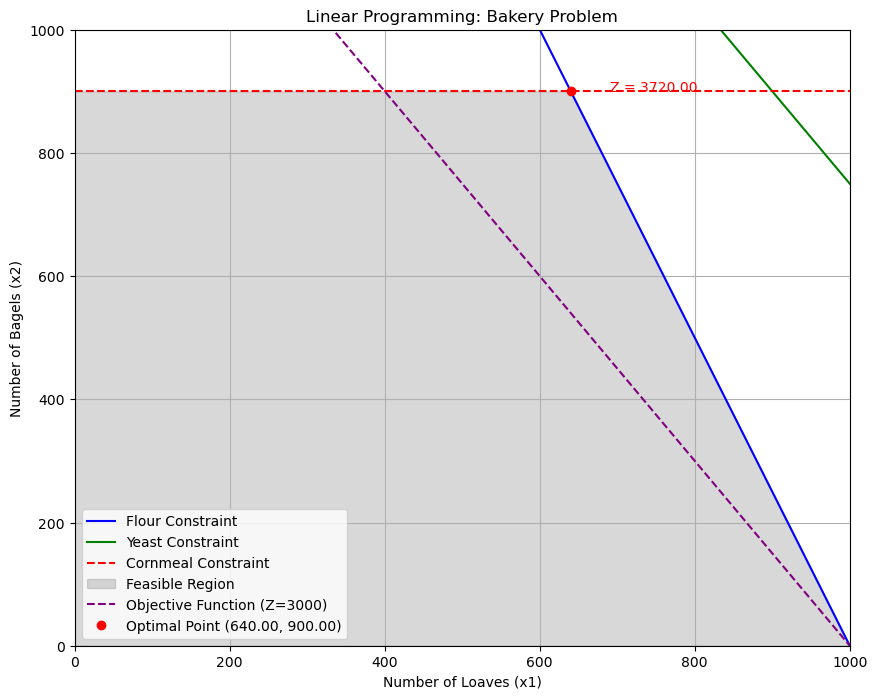

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the range for decision variable x1 (loaves of bread)
x1 = np.linspace(0, 1000, 500)

# Constraints
x2_flour = (500 - 0.5 * x1) / 0.2  # Flour constraint
x2_yeast = (45 - 0.03 * x1) / 0.02  # Yeast constraint
x2_cornmeal = np.full_like(x1, 900)  # Cornmeal constraint (horizontal line)

# Feasibility constraints (x2 cannot be negative)
x2_flour = np.clip(x2_flour, 0, None)
x2_yeast = np.clip(x2_yeast, 0, None)

# Plot the constraints
plt.figure(figsize=(10, 8))
plt.plot(x1, x2_flour, label="Flour Constraint", color="blue")
plt.plot(x1, x2_yeast, label="Yeast Constraint", color="green")
plt.axhline(y=900, color="red", linestyle="--", label="Cornmeal Constraint")

# Feasible region highlighting
plt.fill_between(
    x1, 
    0, 
    np.minimum.reduce([x2_flour, x2_yeast, x2_cornmeal]), 
    color="gray", 
    alpha=0.3, 
    label="Feasible Region"
)

# Plot the objective function line (example at Z=3000)
z = 3000  # Example revenue
x2_objective = (z - 3 * x1) / 2  # Rearranging Z = 3x1 + 2x2
plt.plot(x1, x2_objective, label="Objective Function (Z=3000)", color="purple", linestyle="--")

# Solve the linear programming problem to find the optimal point
c = [-3, -2]  # Coefficients for maximization problem
A = [
    [0.5, 0.2],   # Flour constraint
    [0.03, 0.02], # Yeast constraint
    [0, 0.1]      # Cornmeal constraint
]
b = [500, 45, 90]  # Right-hand side of the constraints
bounds = [(0, None), (0, None)]  # Non-negativity constraints

# Solve the LP problem using linprog
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method="highs")

# Extract optimal values
optimal_x1 = result.x[0]  # Optimal number of loaves
optimal_x2 = result.x[1]  # Optimal number of bagels
optimal_z = -result.fun  # Convert back to maximization by negating

# Plot the optimal point
plt.plot(optimal_x1, optimal_x2, 'ro', label=f'Optimal Point ({optimal_x1:.2f}, {optimal_x2:.2f})')
plt.text(optimal_x1 + 50, optimal_x2, f'Z = {optimal_z:.2f}', color='red')

# Add labels, legend, and grid
plt.xlabel("Number of Loaves (x1)")
plt.ylabel("Number of Bagels (x2)")
plt.title("Linear Programming: Bakery Problem")
plt.legend()
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.grid(True)
plt.show()
